<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/from_machine_learning_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)',setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.753990 sec
Naive NumPy: 1.266666 sec
Good NumPy: 0.025243 sec


In [1]:
import scipy, numpy
scipy.version.full_version
scipy.dot is numpy.dot

False

In [11]:
from io import StringIO
import numpy as np
import scipy as sp
# data = sp.genfromtxt("/content/web_traffic.tsv", delimiter = "\t")
data = np.genfromtxt("/content/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [12]:
x = data[:,0]
y = data[:,1]


In [13]:
sp.sum(sp.isnan(y))

<ipython-input-13-d6e39c765d76>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  sp.sum(sp.isnan(y))
<ipython-input-13-d6e39c765d76>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(sp.isnan(y))


8

In [14]:
>>> x = x[~sp.isnan(y)]
>>> y = y[~sp.isnan(y)]

<ipython-input-14-63f409da33d3>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  x = x[~sp.isnan(y)]
<ipython-input-14-63f409da33d3>:2: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  y = y[~sp.isnan(y)]


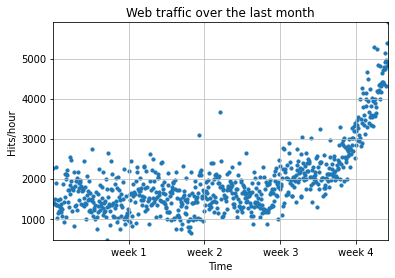

In [15]:
>>> import matplotlib.pyplot as plt
>>> # представляем точки (x,y) кружочками диаметра 10
>>> plt.scatter(x, y, s=10)
>>> plt.title("Web traffic over the last month")
>>> plt.xlabel("Time")
>>> plt.ylabel("Hits/hour")
>>> plt.xticks([w*7*24 for w in range(10)],
                 ['week %i' % w for w in range(10)])
>>> plt.autoscale(tight=True)
>>> # рисуем полупрозрачную сетку пунктирными линиями
>>> plt.grid(True, linestyle='-', color='0.75')
>>> plt.show()